# Housing markets, work in progress

In [192]:
import pandas as pd
import cufflinks as cf
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#from nbwidgets import hide

In [193]:
%matplotlib inline

# Reporänta
**Short info:** Reporäntan är Riksbankens styrränta sedan 1994. Reporäntan är den ränta som bankerna kan låna eller placera till i Riksbanken på sju dagar.

**Source:** http://www.riksbank.se/sv/Rantor-och-valutakurser/Reporanta-tabell/?all=1
    

In [195]:
file = open("reporänta", "r")
df_repo = pd.read_csv(file, sep=";", parse_dates=True, infer_datetime_format=True, decimal=b',')
df_repo["dt"] = pd.to_datetime(df_repo["Per förändring Effektiv"])
df_repo.drop("Per förändring Effektiv", axis=1, inplace=True)
df_repo.set_index("dt", inplace=True)
df_repo.sort_index(inplace=True)
df_repo.head()

,Reporänta,Förändring i procentenheter,Inlånings-ränta,Utlånings-ränta
dt,,,,
1994-06-01,6.95,-0.05,6.0,7.5
1994-06-15,6.92,-0.03,6.0,7.5
1994-08-16,6.92,0.00,6.0,8.0
1994-08-17,7.20,0.28,6.0,8.0
1994-11-02,7.40,0.20,6.0,8.0


# Inflationsjusterat fastighetsprisindex
**Short info: **
Avser en- och tvåfamiljshus samt rad- och kedjehus. Indexet tar hänsyn till att det nödvändigtvis inte är helt jämförbara fastigheter som säljs vid varje mättillfälle genom att dela in de sålda fastigheterna efter taxeringsvärde och geografisk placering. Serien har justerats för inflation genom KPI och basperiod är i utgångsläget 1986 kv 1, eller enligt val i diagrammet

**Source:** http://www.ekonomifakta.se/Fakta/Ekonomi/Hushallens-ekonomi/Bostadspriser/

In [185]:
file2 = open("fastighetsIndex.csv", "r")
df_fast = pd.read_csv(file2, sep=",", parse_dates=True, infer_datetime_format=True, decimal=b',')

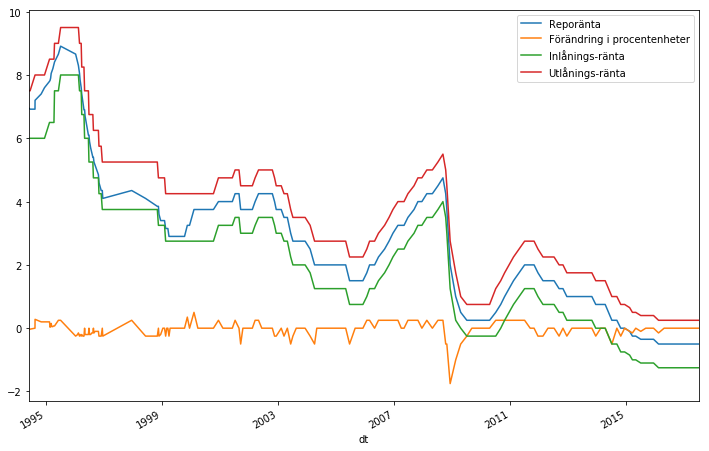

In [186]:
df_repo.plot(figsize=[12,8])

In [187]:
# Turn quarters into dates
df_fast[['year','q']] = df_fast.dt.str.split(', kv ', expand=True)
df_fast.year = df_fast.year.astype(int)
df_fast.q = 'Q' + df_fast.q

df_fast["dt"] = df_fast["year"].map(str) + df_fast["q"]
df_fast["dt"] = pd.to_datetime(df_fast["dt"])
df_fast.drop('year', axis=1, inplace=True)
df_fast.drop('q', axis=1, inplace=True)
df_fast.set_index("dt", inplace=True)
df_fast.head()

,Riket,Övre Norrland,Stockholms län
dt,,,
1986-01-01,100.00,100.00,100.00
1986-04-01,100.90,103.70,100.00
1986-07-01,103.60,103.70,104.27
1986-10-01,105.41,105.56,109.40
1987-01-01,108.11,105.56,112.82


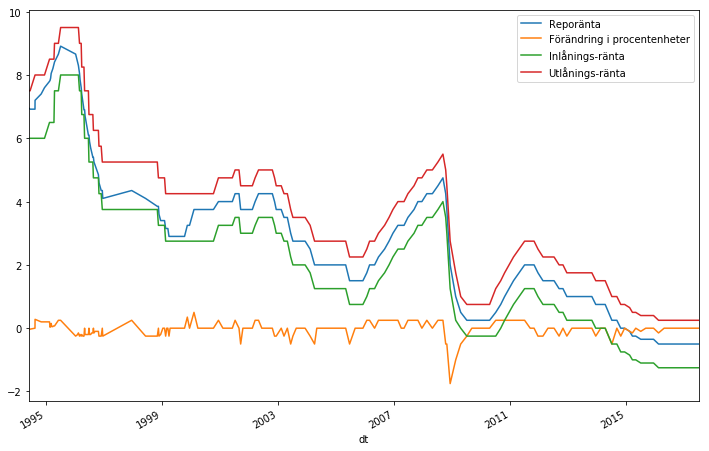

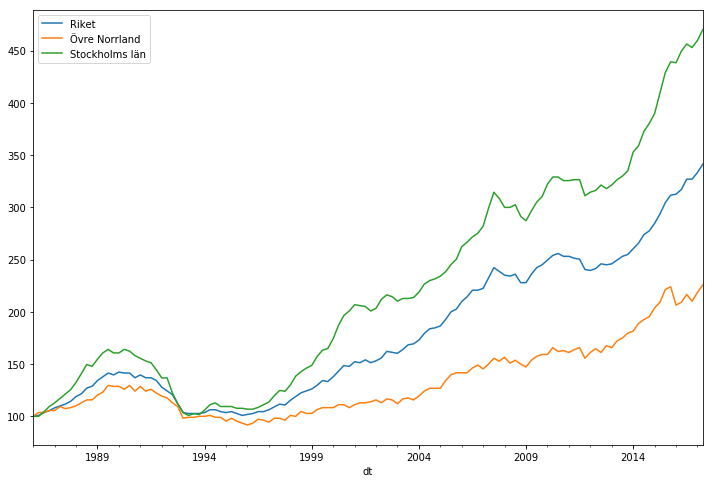

In [188]:
df_repo.plot(figsize=[12,8])
df_fast.plot(figsize=[12,8])

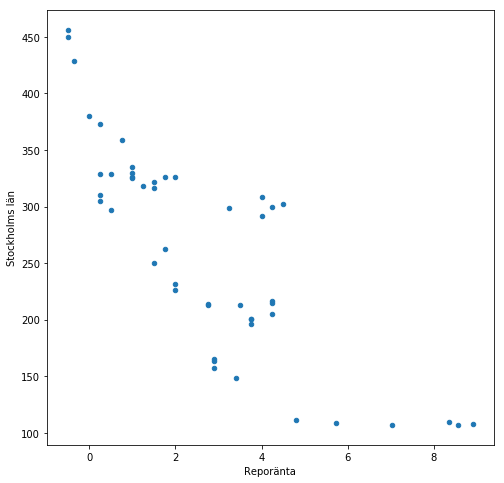

In [190]:
df_corr = df_fast.join(df_repo.resample("MS").mean())
df_corr.plot(kind="Scatter", y="Stockholms län", x="Reporänta", figsize=[8,8])